In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# # Create Python package from Rust code
# maturin develop --release

In [3]:
import src.benchmark_utils as benchmark_utils

# Define a causal structure

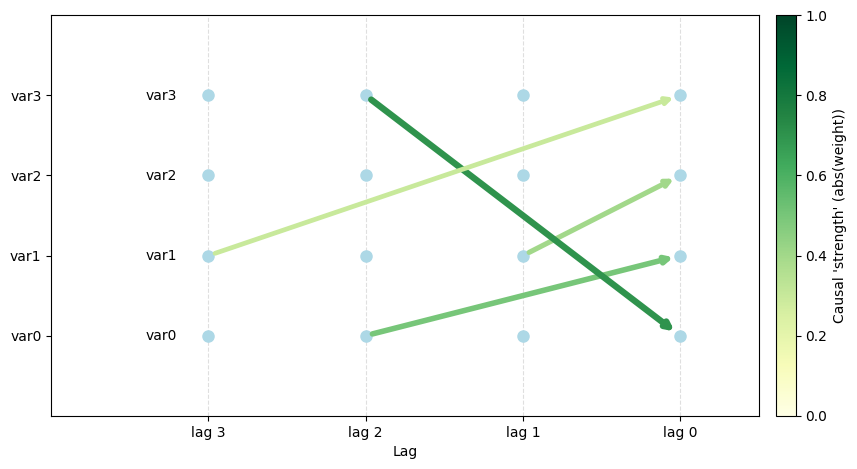

In [4]:
n_vars = 4
var_names = [f"var{i}" for i in range(n_vars)]
causal_edges = [
    # (orig, dest, lag, weight)
    ("var1", "var2", 1, 0.4),
    ("var0", "var1", 2, 0.5),
    ("var3", "var0", 2, 0.7),
    ("var1", "var3", 3, 0.3),
    # ("var2", "var3", 3, 0.3),
]

causal_structure = benchmark_utils.CausalStructure(causal_edges, var_names)
causal_structure.plot()

# Define base parameters for the PCMCI algorithm

In [5]:
base_params = {
    "n_time": 5000,
    "n_vars": n_vars+1,  # +1 for noise variable
    "max_lag": 2,
    "alpha": 0.05,
    "cond_size": 3,
    "subsets": 1,
}

bench = benchmark_utils.BenchmarkParam(
    causal_structure=causal_structure,
    noise_level=0.1
)

# Execute Tigramite and Rust versions of PCMCI with the base parameters and compare causal structures identified

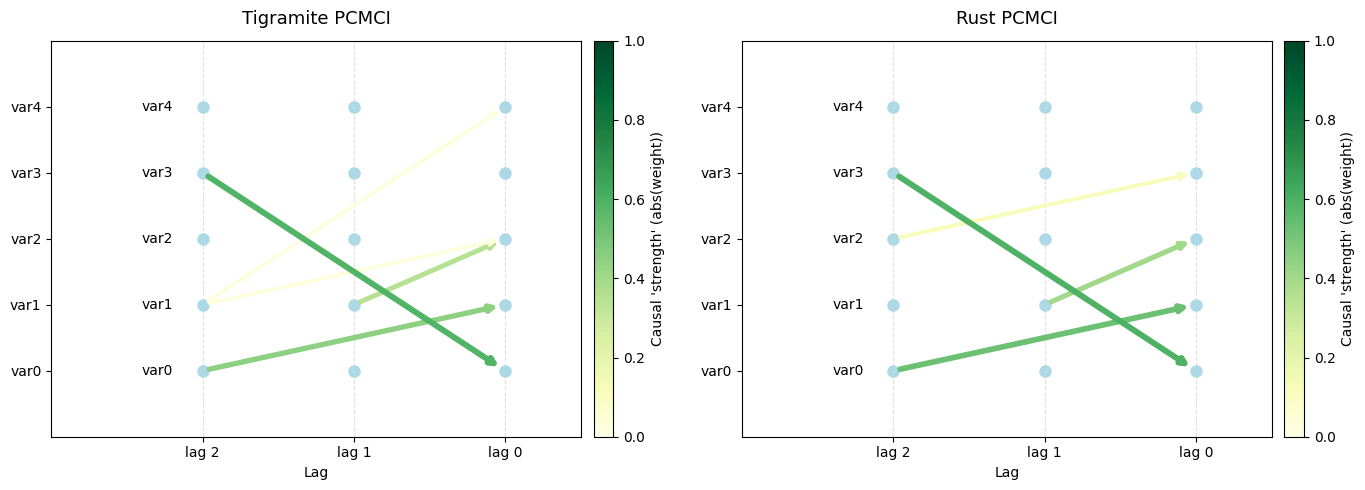

In [7]:
bench.plot_causal_structures(base_params)

# Benchmark the PCMCI implementations varying one parameter (similarity measures and execution time)

### n_time

In [22]:
bench.run(
    param_name="n_time",
    param_values=[5000, 10000, 20000, 40000, 80000, 120000],
    fixed_params=base_params,
    n_runs=2
)

bench.results

,n_time,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,5000,0.196923,0.017466,0.289130,0.985521,0.993854
1,10000,0.402555,0.059357,0.285689,0.986404,0.994828
2,20000,0.474563,0.047801,0.287668,0.986227,0.994486
3,40000,0.714967,0.076983,0.288071,0.985734,0.994045
4,80000,1.709067,0.118750,0.288500,0.985504,0.994507
5,120000,2.951126,0.235075,0.288727,0.985181,0.994327


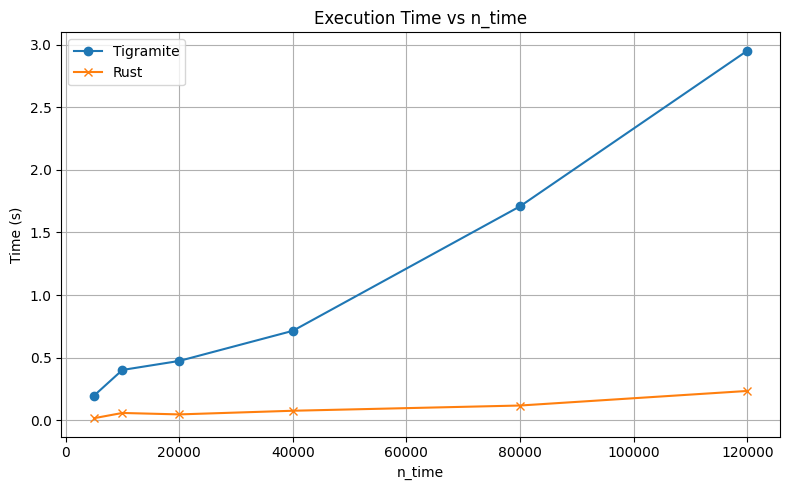

In [23]:
bench.plot_exec_time()

### n_vars

In [28]:
bench.run(
    param_name="n_vars",
    param_values=[4, 10, 20, 30],
    fixed_params=base_params,
    n_runs=1
)

bench.results

,n_vars,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,4,0.482102,0.015004,0.285957,0.984354,0.994803
1,10,1.478431,0.106287,0.107963,0.984246,0.981996
2,20,6.712526,0.274870,0.041533,0.985483,0.984738
3,30,15.003343,0.468713,0.042939,0.984023,0.983576


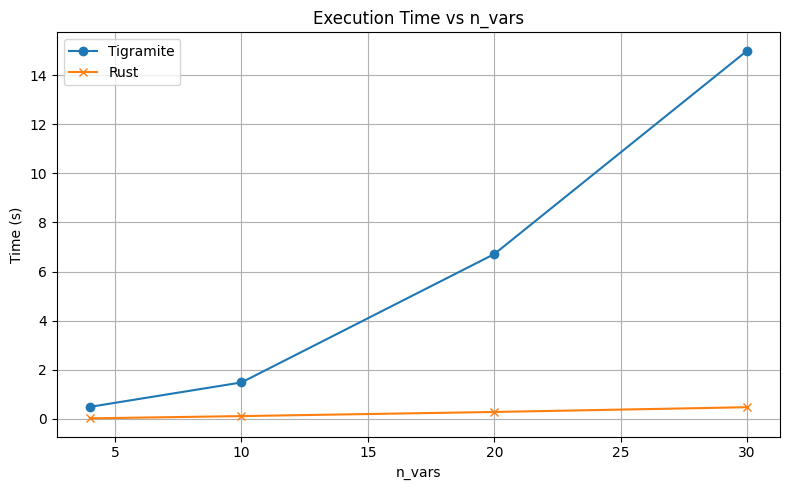

In [29]:
bench.plot_exec_time()

### max_lag

In [8]:
bench.run(
    param_name="max_lag",
    param_values=[1, 3, 6, 9, 12, 15],
    fixed_params=base_params,
    n_runs=1
)

bench.results

,max_lag,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,1,0.100714,0.007166,0.003059,0.999999,1.000000
1,3,0.307905,0.028662,0.031140,0.997503,0.993158
2,6,0.855673,0.039622,0.009956,0.999993,0.999988
3,9,1.171144,0.077556,0.004764,0.999998,0.999997
4,12,1.848860,0.074706,0.032774,0.999893,0.999808
5,15,2.367747,0.197497,0.017032,0.999905,0.999923


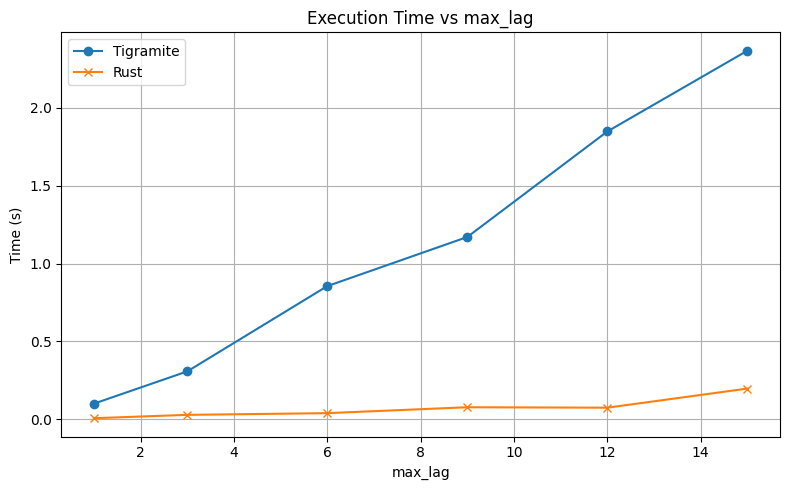

In [10]:
bench.plot_exec_time()